<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/caltech-bird-classifier/blob/master/Caltech_UCSD_Birds_200_2011_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz

--2019-04-01 14:16:01--  http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150585339 (1.1G) [application/x-tar]
Saving to: ‘CUB_200_2011.tgz’

CUB_200_2011.tgz    100%[===================>]   1.07G  6.82MB/s    in 2m 58s  

2019-04-01 14:19:00 (6.17 MB/s) - ‘CUB_200_2011.tgz’ saved [1150585339/1150585339]



In [0]:
!tar xvzf "./CUB_200_2011.tgz"

In [5]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
from fastai.vision import *

In [0]:
path = Path("./CUB_200_2011/images")

In [0]:
path.ls()

In [0]:
tfms = get_transforms()

In [0]:
data = (ImageList.from_folder(path)
       .split_by_rand_pct()
       .label_from_folder()
       .transform(tfms, size=128)
       .databunch()).normalize(imagenet_stats)

In [16]:
data.c

200

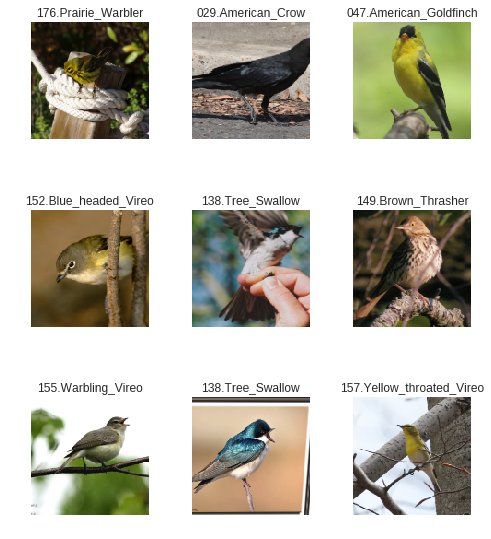

In [28]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
from fastai.metrics import error_rate

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 81017647.79it/s]


In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


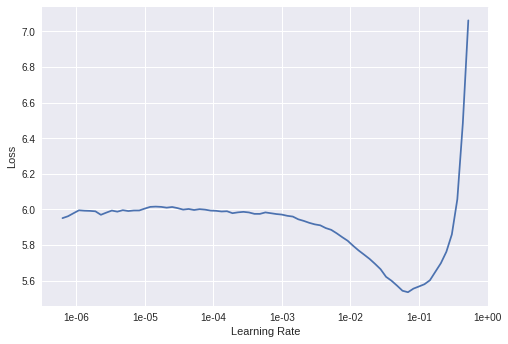

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(10, slice(1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,4.457742,3.234188,0.728468,02:29
1,2.883479,2.216819,0.578702,02:30
2,2.453892,1.886518,0.505728,02:29
3,2.057352,1.688956,0.446330,02:29
4,1.827391,1.604901,0.438269,02:29
5,1.643294,1.505341,0.413237,02:29
6,1.387379,1.402725,0.385235,02:29
7,1.206939,1.338894,0.362749,02:31
8,1.085752,1.312498,0.361901,02:30
9,1.023584,1.300109,0.358082,02:30


In [0]:

learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


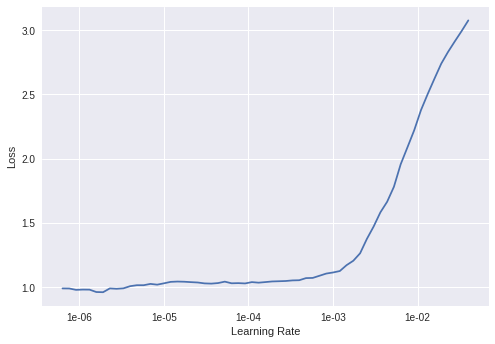

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(10, slice(1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,1.019488,1.300547,0.361052,02:32
1,1.018175,1.290444,0.356809,02:32
2,0.979838,1.278731,0.348748,02:30
3,0.944088,1.255007,0.342384,02:31
4,0.908342,1.231615,0.336020,02:31
5,0.841341,1.223337,0.330929,02:32
6,0.823683,1.220486,0.330929,02:32
7,0.809346,1.214639,0.327959,02:31
8,0.778833,1.214569,0.331353,02:32
9,0.775735,1.211670,0.326686,02:32


In [0]:
defaults.device = torch.device('cpu')


In [35]:
from google.colab import files
files.upload()

Saving rusty_blackbird.jpg to rusty_blackbird.jpg


{'rusty_blackbird.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x01h\x01\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\x08\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xd9\x01\xe8\x8e\x89\x92\x98\x88\x18\x1e\x1e79\xe7\xc4\x08\xeb\x0c\x10\xa5E\x96n\xd8\xb6\xc8iK\xcf\xbb\x84R\xae\x8e\x1f9\x11=\xc1\x1d\xd3\xd3\x11\xd1\x06\xfb/c\x19\xd1\xd1X\x18J\x9a\xf9\xb3i\xed\xb6\xe9g\x13\xc8dV\xb4\x07\t\x16\x18\xf4DwGwtH\xf3\xb44l\xc8q\xc8*\xbdtu\x99\n\xd4f\xdb\xa1\xf6"9n\x98\x90B\xd5&l\x9c\xc8\x1e\x88\x83\x10\x89\xe99=\x0b\xf6\xd9\xc2\xae\x85W\xa9Y+\xb0\xf8\xac\x0eq\x19\x

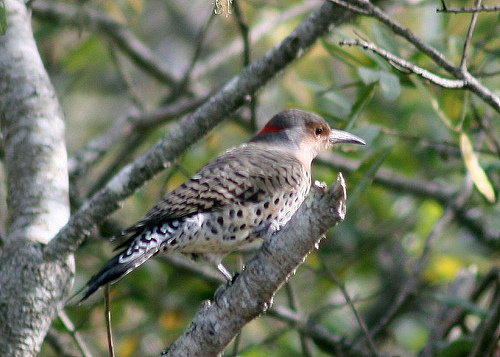

In [52]:
img = open_image('./CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0011_28466.jpg')
img

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 036.Northern_Flicker

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

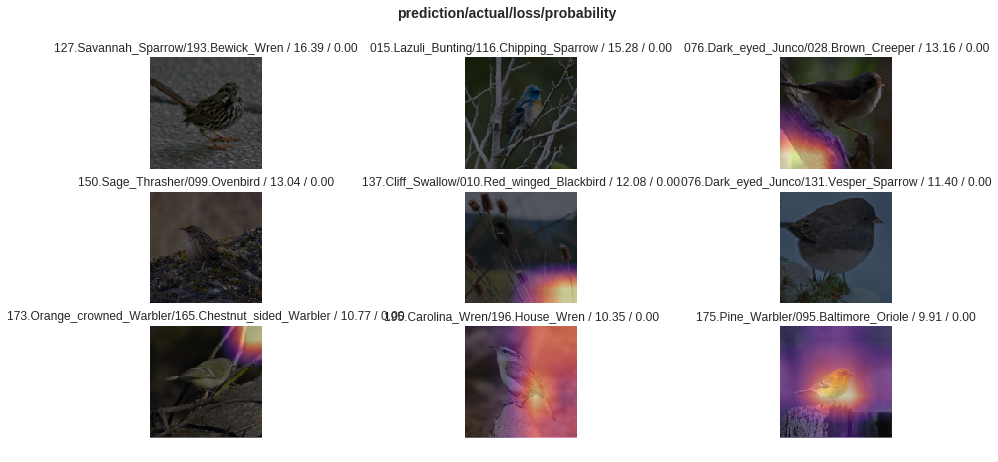

In [51]:
interp.plot_top_losses(9, figsize=(16,7))
